In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from jupyter_core.migrate import regex

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

pd.options.display.float_format = '{:,.2f}'.format

pd.set_option('display.max_columns', None)

# Exploratory Data Analysis (EDA)

In [3]:
df = pd.read_excel("./data/online_retail_II.xlsx", sheet_name=0)

df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,"13,085.00",United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,"13,085.00",United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,"13,085.00",United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,"13,085.00",United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,"13,085.00",United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,"13,085.00",United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,"13,085.00",United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,"13,085.00",United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,"13,085.00",United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,"13,085.00",United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [5]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,"525,461.00",525461,"525,461.00","417,534.00"
mean,10.34,2010-06-28 11:37:36.845017856,4.69,"15,360.65"
min,"-9,600.00",2009-12-01 07:45:00,"-53,594.36","12,346.00"
25%,1.00,2010-03-21 12:20:00,1.25,"13,983.00"
50%,3.00,2010-07-06 09:51:00,2.10,"15,311.00"
75%,10.00,2010-10-15 12:45:00,4.21,"16,799.00"
max,"19,152.00",2010-12-09 20:01:00,"25,111.09","18,287.00"
std,107.42,NaN,146.13,"1,680.81"


In [6]:
df.describe(include='O')

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


In [7]:
df[df["Customer ID"].isna()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65,NaN,United Kingdom


### Evaluate records with negative quantity

Note: found values for Stock Code with different patterns

In [8]:
df[df["Quantity"] < 0].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,"16,321.00",Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,"16,321.00",Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,"16,321.00",Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,"16,321.00",Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,"16,321.00",Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,"16,321.00",Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,"16,321.00",Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,"16,321.00",Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,"16,321.00",Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,"17,592.00",United Kingdom


In [9]:
df["Invoice"] = df["Invoice"].astype(str)
df[df["Invoice"].str.match("^\\d{6}$") == True]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,"13,085.00",United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,"13,085.00",United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,"13,085.00",United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,"13,085.00",United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,"13,085.00",United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,"17,530.00",United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,"17,530.00",United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,"17,530.00",United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,"17,530.00",United Kingdom


In [10]:
df["Invoice"].str.replace("[0-9]", "", regex=True).unique()

array(['', 'C', 'A'], dtype=object)

In [11]:
df[df["Invoice"].str.startswith("A")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,"-53,594.36",NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,"-44,031.79",NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,"-38,925.87",NaN,United Kingdom


In [12]:
df["StockCode"] = df["StockCode"].astype(str)
df[(df["StockCode"].str.match("^\\d{5}$") == False)
   & (df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == False)]["StockCode"].unique()

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

### Stock Code
Stock Code is meant to follow the pattern `[0-9]{5}`, but values that follow `[0-9]{5}[a-zA-Z]+`.

| Categoria | Códigos de Exemplo                               | Significado Provável                                                                                                                       | Implicação para a Análise                                                                                                                                                                                                          |
| :--- |:-------------------------------------------------|:-------------------------------------------------------------------------------------------------------------------------------------------|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Custos Operacionais** | `POST`, `DOT`, `C2`, `S`, `M`                    | Taxas de envio ou postagem (`POST` = Postagem, `DOT` = Dotcom postagem, `C2` = Taxa de transporte, `S` = Amostras, `M` = Manual).          | Representam custos de serviço, não produtos. Devem ser **excluídos** da análise de RFM, pois não refletem o comportamento de compra de produtos.                                                                                   |
| **Ajustes e Taxas** | `BANK CHARGES`, `ADJUST`, `ADJUST2`, `AMAZONFEE` | Encargos bancários, ajustes de saldo ou taxas de plataformas de terceiros (como a Amazon).                                                 | São transações financeiras, não compras de clientes. Devem ser **excluídos** da análise de RFM.                                                                                                                                    |
| **Itens de Teste** | `TEST001`, `TEST002`                             | Itens criados para testar o sistema de transações.                                                                                         | Não são compras reais de clientes e devem ser **excluídos**.                                                                                                                                                                       |
| **Vales-Presente** | `gift_0001_...`                                  | Compra ou uso de vales-presente (gift cards).                                                                                              | Embora seja uma transação monetária, pode não refletir o mesmo tipo de intenção de compra que um produto físico. A decisão de incluir ou excluir depende do objetivo, mas para uma análise de produtos, é mais seguro **excluir**. |
| **Design de Catálogo** | `DCGS...`, `DCGSSGIRL`, `DCGSLBOY`               | Códigos relacionados a um "Design de Catálogo" ou a uma coleção específica, possivelmente itens personalizados ou de um catálogo especial. | Estes parecem ser códigos de produtos, mas com um formato diferente. Precisariam de uma investigação mais aprofundada. Se tiverem preços e quantidades válidos, poderiam ser mantidos. Caso contrário, é mais seguro **excluir**.  |
| **Outros** | `PADS`                                           | Código legítimo para padding.                                                                                                              | Considerando como un código legítimo, é seguro **incluir** na análise de clusterização.                                                                                                                                            |
| **Outros/Desconhecidos** | `PADS`, `B`, `C3`, `SP1002`, `m`                 | Códigos cujo significado não é imediatamente claro.                                                                                        | Por segurança e para manter a consistência dos dados, a melhor prática é **excluir** esses códigos ambíguos da análise de clusterização.                                                                                           |

# Data Cleaning

In [13]:
cleaned_df = df.copy()

In [14]:
cleaned_df["Invoice"] = cleaned_df["Invoice"].astype(str)

mask = (
    cleaned_df["Invoice"].str.match("^\\d{6}$") == True
)

cleaned_df = cleaned_df[mask]

cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,"13,085.00",United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,"13,085.00",United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,"13,085.00",United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,"13,085.00",United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,"13,085.00",United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,"17,530.00",United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,"17,530.00",United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,"17,530.00",United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,"17,530.00",United Kingdom


In [15]:
cleaned_df["StockCode"] = cleaned_df["StockCode"].astype(str)

mask = (
    (cleaned_df["StockCode"].str.match("^\\d{5}$") == True)
    | (cleaned_df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == True)
    | (cleaned_df["StockCode"].str.match("^PADS$") == True)
)

cleaned_df = cleaned_df[mask]

cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,"13,085.00",United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,"13,085.00",United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,"13,085.00",United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,"13,085.00",United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,"13,085.00",United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,"17,530.00",United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,"17,530.00",United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,"17,530.00",United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,"17,530.00",United Kingdom


In [16]:
cleaned_df.dropna(subset=["Customer ID"], inplace=True)

/var/folders/8_/x1bt0c3j4fx8b4vg7ww1mlb40000gn/T/ipykernel_53824/1149358903.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.dropna(subset=["Customer ID"], inplace=True)


In [17]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,"406,337.00",406337,"406,337.00","406,337.00"
mean,13.62,2010-07-01 10:11:06.543288320,2.99,"15,373.63"
min,1.00,2009-12-01 07:45:00,0.00,"12,346.00"
25%,2.00,2010-03-26 14:01:00,1.25,"14,004.00"
50%,5.00,2010-07-09 15:48:00,1.95,"15,326.00"
75%,12.00,2010-10-14 17:09:00,3.75,"16,814.00"
max,"19,152.00",2010-12-09 20:01:00,295.00,"18,287.00"
std,97.00,NaN,4.29,"1,677.37"


### Zero-valued prices
Even after treating `Invoice`, `Stock Code` and null `Customer ID`, there are still prices with value 0.

After investigating it, it was found that only 28 records had that problem. As it is neither a significant amount nor interesting to include them in the clustering analysis, it was decided to exclude those records.

In [18]:
cleaned_df[cleaned_df["Price"] == 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
4674,489825,22076,6 RIBBONS EMPIRE,12,2009-12-02 13:34:00,0.00,"16,126.00",United Kingdom
6781,489998,48185,DOOR MAT FAIRY CAKE,2,2009-12-03 11:19:00,0.00,"15,658.00",United Kingdom
18738,490961,22065,CHRISTMAS PUDDING TRINKET POT,1,2009-12-08 15:25:00,0.00,"14,108.00",United Kingdom
18739,490961,22142,CHRISTMAS CRAFT WHITE FAIRY,12,2009-12-08 15:25:00,0.00,"14,108.00",United Kingdom
32916,492079,85042,ANTIQUE LILY FAIRY LIGHTS,8,2009-12-15 13:49:00,0.00,"15,070.00",United Kingdom
40101,492760,21143,ANTIQUE GLASS HEART DECORATION,12,2009-12-18 14:22:00,0.00,"18,071.00",United Kingdom
47126,493761,79320,FLAMINGO LIGHTS,24,2010-01-06 14:54:00,0.00,"14,258.00",United Kingdom
48342,493899,22355,"CHARLOTTE BAG , SUKI DESIGN",10,2010-01-08 10:43:00,0.00,"12,417.00",Belgium
57619,494607,21533,RETRO SPOT LARGE MILK JUG,12,2010-01-15 12:43:00,0.00,"16,858.00",United Kingdom
111348,500073,21662,VINTAGE GLASS COFFEE CADDY,1,2010-03-04 11:44:00,0.00,"13,047.00",United Kingdom


In [19]:
cleaned_df = cleaned_df[cleaned_df["Price"] > 0]

cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,"13,085.00",United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,"13,085.00",United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,"13,085.00",United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,"13,085.00",United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,"13,085.00",United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,"17,530.00",United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,"17,530.00",United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,"17,530.00",United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,"17,530.00",United Kingdom


In [20]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,"406,309.00",406309,"406,309.00","406,309.00"
mean,13.62,2010-07-01 10:14:25.869572352,2.99,"15,373.72"
min,1.00,2009-12-01 07:45:00,0.00,"12,346.00"
25%,2.00,2010-03-26 14:01:00,1.25,"14,006.00"
50%,5.00,2010-07-09 15:48:00,1.95,"15,326.00"
75%,12.00,2010-10-14 17:09:00,3.75,"16,814.00"
max,"19,152.00",2010-12-09 20:01:00,295.00,"18,287.00"
std,97.00,NaN,4.29,"1,677.33"


Note: The dataset description was still displaying 0 as the min value of `Price`. After analysis, it was found that it is not 0, but really close to it (0.001).

In [21]:
cleaned_df["Price"].min()

0.001

After cleaning, about 23% of the records where excluded.

In [22]:
len(cleaned_df) / len(df)

0.7732429238325965

# Feature Engineering

In [23]:
cleaned_df["SalesLineTotal"] = cleaned_df["Quantity"] * cleaned_df["Price"]

cleaned_df

/var/folders/8_/x1bt0c3j4fx8b4vg7ww1mlb40000gn/T/ipykernel_53824/1259935661.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["SalesLineTotal"] = cleaned_df["Quantity"] * cleaned_df["Price"]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,SalesLineTotal
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,"13,085.00",United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,"13,085.00",United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,"13,085.00",United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,"13,085.00",United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,"13,085.00",United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,"17,530.00",United Kingdom,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,"17,530.00",United Kingdom,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,"17,530.00",United Kingdom,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,"17,530.00",United Kingdom,7.50


In [24]:
aggregated_df = cleaned_df.groupby(by="Customer ID", as_index=False) \
    .agg(
            MonetaryValue=("SalesLineTotal", "sum"),
            Frequency=("Invoice", "nunique"),
            LastInvoiceDate=("InvoiceDate", "max")
    )

aggregated_df.head(10)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,"12,346.00",169.36,2,2010-06-28 13:53:00
1,"12,347.00","1,323.32",2,2010-12-07 14:57:00
2,"12,348.00",221.16,1,2010-09-27 14:59:00
3,"12,349.00","2,221.14",2,2010-10-28 08:23:00
4,"12,351.00",300.93,1,2010-11-29 15:23:00
5,"12,352.00",343.80,2,2010-11-29 10:07:00
6,"12,353.00",317.76,1,2010-10-27 12:44:00
7,"12,355.00",488.21,1,2010-05-21 11:59:00
8,"12,356.00","3,126.25",3,2010-11-24 12:24:00
9,"12,357.00","11,229.99",1,2010-11-16 10:05:00


Note: Here, the `max_invoice_date` is being used to calculate recency, but only because the dataset is old. In a real scenario, it would be better to use the current date to calculate recency.

In [25]:
max_invoice_date = aggregated_df["LastInvoiceDate"].max()

aggregated_df["Recency"] = (max_invoice_date - aggregated_df["LastInvoiceDate"]).dt.days

aggregated_df.head(10)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,"12,346.00",169.36,2,2010-06-28 13:53:00,164
1,"12,347.00","1,323.32",2,2010-12-07 14:57:00,2
2,"12,348.00",221.16,1,2010-09-27 14:59:00,73
3,"12,349.00","2,221.14",2,2010-10-28 08:23:00,42
4,"12,351.00",300.93,1,2010-11-29 15:23:00,10
5,"12,352.00",343.80,2,2010-11-29 10:07:00,10
6,"12,353.00",317.76,1,2010-10-27 12:44:00,43
7,"12,355.00",488.21,1,2010-05-21 11:59:00,202
8,"12,356.00","3,126.25",3,2010-11-24 12:24:00,15
9,"12,357.00","11,229.99",1,2010-11-16 10:05:00,23


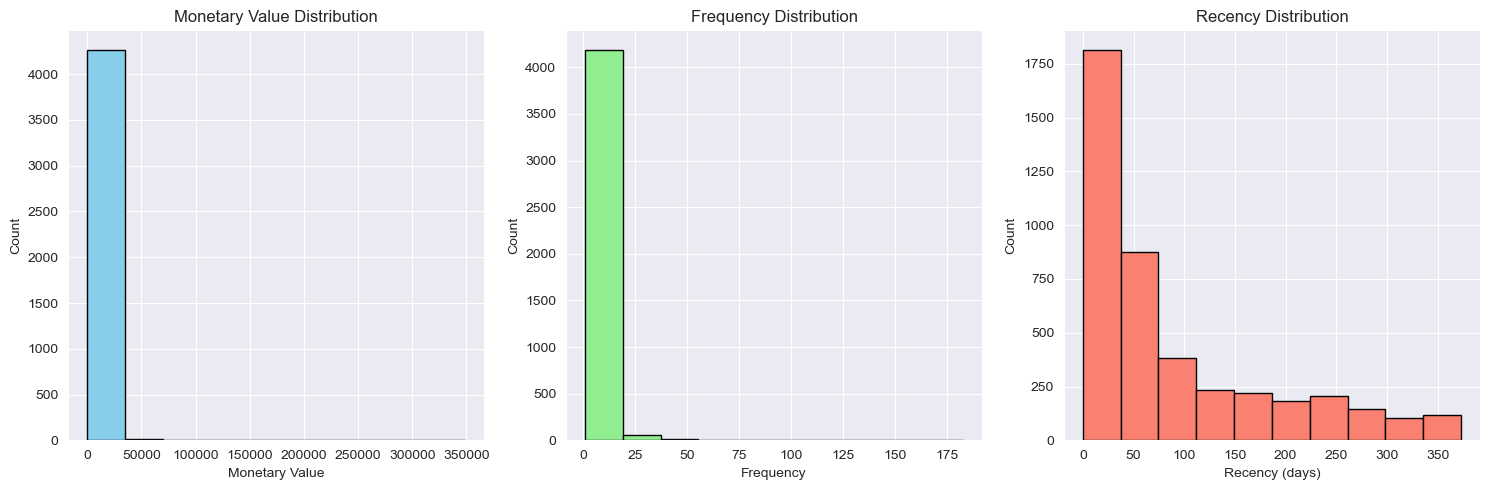

In [31]:
plt.figure(figsize=[15, 5])

plt.subplot(1, 3, 1)
plt.hist(aggregated_df["MonetaryValue"], bins=10, color="skyblue", edgecolor="black")
plt.title("Monetary Value Distribution")
plt.xlabel("Monetary Value")
plt.ylabel("Count")

plt.subplot(1, 3, 2)
plt.hist(aggregated_df["Frequency"], bins=10, color="lightgreen", edgecolor="black")
plt.title("Frequency Distribution")
plt.xlabel("Frequency")
plt.ylabel("Count")

plt.subplot(1, 3, 3)
plt.hist(aggregated_df["Recency"], bins=10, color="salmon", edgecolor="black")
plt.title("Recency Distribution")
plt.xlabel("Recency (days)")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

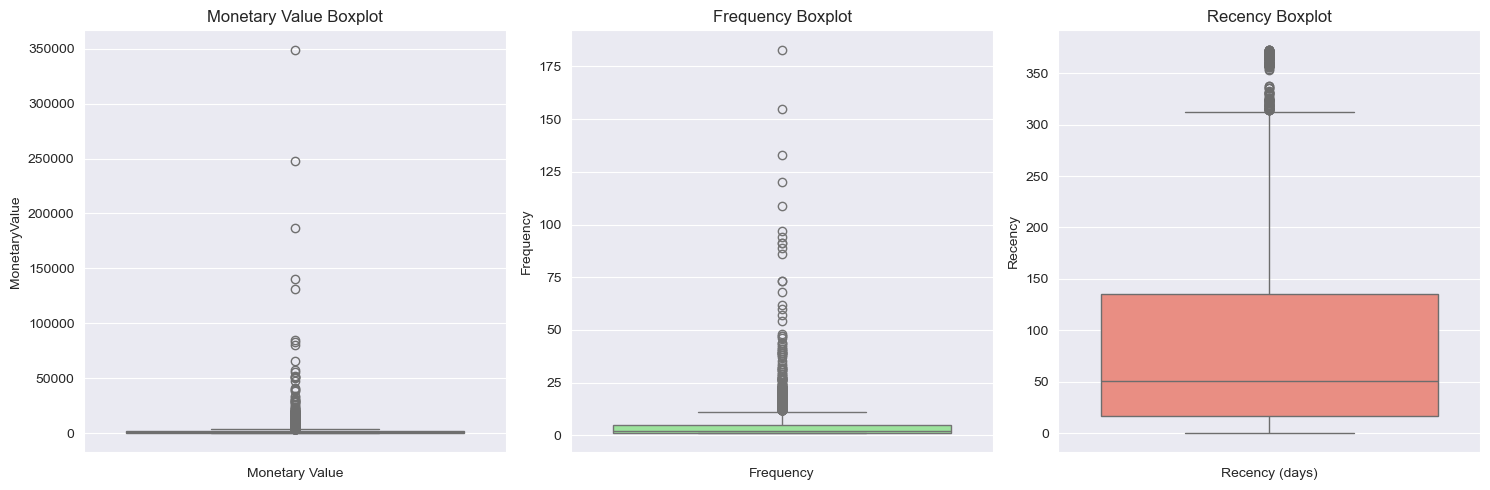

In [32]:
plt.figure(figsize=[15, 5])

plt.subplot(1, 3, 1)
sns.boxplot(data=aggregated_df["MonetaryValue"], color="skyblue")
plt.title("Monetary Value Boxplot")
plt.xlabel("Monetary Value")

plt.subplot(1, 3, 2)
sns.boxplot(data=aggregated_df["Frequency"], color="lightgreen")
plt.title("Frequency Boxplot")
plt.xlabel("Frequency")

plt.subplot(1, 3, 3)
sns.boxplot(data=aggregated_df["Recency"], color="salmon")
plt.title("Recency Boxplot")
plt.xlabel("Recency (days)")

plt.tight_layout()
plt.show()

In [33]:
M_Q1 = aggregated_df["MonetaryValue"].quantile(0.25) # First quartile
M_Q3 = aggregated_df["MonetaryValue"].quantile(0.75) # Third quartile
M_IQR = M_Q3 - M_Q1 # Interquartile range

monetary_outliers_df = aggregated_df[
    (aggregated_df["MonetaryValue"] < (M_Q1 - 1.5 * M_IQR)) | # Lower outliers
    (aggregated_df["MonetaryValue"] > (M_Q3 + 1.5 * M_IQR))   # Upper outliers
].copy()

monetary_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,423.00,423.00,423.00,423,423.00
mean,"15,103.04","12,188.10",17.17,2010-11-09 12:26:02.978723328,30.04
min,"12,357.00","3,802.04",1.00,2009-12-10 18:03:00,0.00
25%,"13,622.00","4,605.94",8.00,2010-11-08 13:17:30,3.00
50%,"14,961.00","6,191.32",12.00,2010-11-26 12:19:00,13.00
75%,"16,692.00","10,273.24",18.00,2010-12-06 10:34:30,31.00
max,"18,260.00","349,164.35",183.00,2010-12-09 19:32:00,364.00
std,"1,728.66","25,830.85",19.73,NaN,51.54


In [34]:
 F_Q3 = aggregated_df["Frequency"].quantile(0.75)
F_IQR = F_Q3 - F_Q1

frequency_outliers_df = aggregated_df[
    (aggregated_df["Frequency"] < (F_Q1 - 1.5 * F_IQR)) |
    (aggregated_df["Frequency"] > (F_Q3 + 1.5 * F_IQR))
].copy()

frequency_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,279.00,279.00,279.00,279,279.00
mean,"15,352.66","14,409.71",23.81,2010-11-23 11:06:20.645161216,16.09
min,"12,437.00","1,094.39",12.00,2010-05-12 16:51:00,0.00
25%,"13,800.00","4,331.56",13.00,2010-11-20 13:14:30,2.00
50%,"15,465.00","6,615.77",17.00,2010-12-02 10:46:00,7.00
75%,"16,828.50","11,692.41",23.00,2010-12-07 11:08:30,19.00
max,"18,260.00","349,164.35",183.00,2010-12-09 19:32:00,211.00
std,"1,748.43","31,381.74",21.93,NaN,26.59


Logically, someone who buys more frequently should also spend more money.

In [35]:
non_outliers_df = aggregated_df[(~aggregated_df.index.isin(monetary_outliers_df.index)) &
                                (~aggregated_df.index.isin(frequency_outliers_df.index))]
non_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,"3,809.00","3,809.00","3,809.00",3809,"3,809.00"
mean,"15,376.48",885.50,2.86,2010-09-03 11:16:46.516146176,97.08
min,"12,346.00",1.55,1.00,2009-12-01 10:49:00,0.00
25%,"13,912.00",279.91,1.00,2010-07-08 14:48:00,22.00
50%,"15,389.00",588.05,2.00,2010-10-12 16:25:00,58.00
75%,"16,854.00","1,269.05",4.00,2010-11-17 13:14:00,154.00
max,"18,287.00","3,788.21",11.00,2010-12-09 20:01:00,373.00
std,"1,693.20",817.67,2.24,NaN,98.11


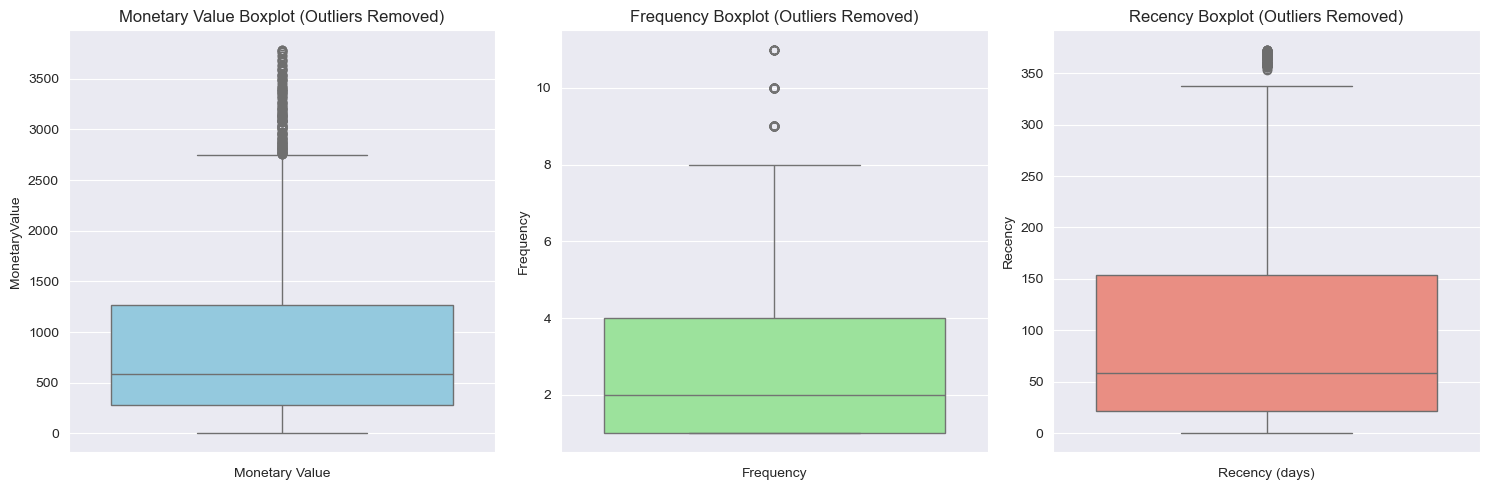

In [36]:
plt.figure(figsize=[15, 5])

plt.subplot(1, 3, 1)
sns.boxplot(data=non_outliers_df["MonetaryValue"], color="skyblue")
plt.title("Monetary Value Boxplot (Outliers Removed)")
plt.xlabel("Monetary Value")

plt.subplot(1, 3, 2)
sns.boxplot(data=non_outliers_df["Frequency"], color="lightgreen")
plt.title("Frequency Boxplot (Outliers Removed)")
plt.xlabel("Frequency")

plt.subplot(1, 3, 3)
sns.boxplot(data=non_outliers_df["Recency"], color="salmon")
plt.title("Recency Boxplot (Outliers Removed)")
plt.xlabel("Recency (days)")

plt.tight_layout()
plt.show()

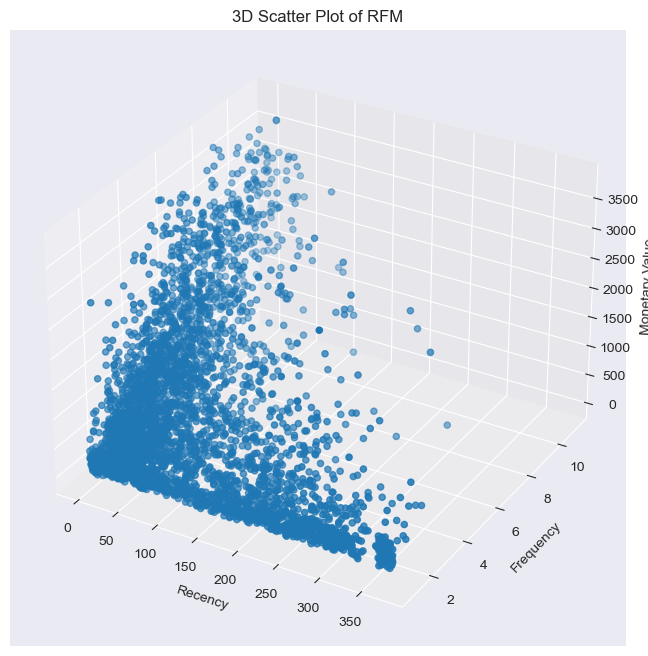

In [37]:
fig = plt.figure(figsize=[8, 8])

ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(
    non_outliers_df["Recency"],
    non_outliers_df["Frequency"],
    non_outliers_df["MonetaryValue"]
)

ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetary Value")
ax.set_title("3D Scatter Plot of RFM")

plt.show()

### Standardization
As the RFM variables are in different scales, it is necessary to standardize them before applying clustering algorithms, because they're sensitive to the scale of the data.

Standard scaling transforms the data to have a mean of 0 and a standard deviation of 1, which ensures that each feature contributes equally to the analysis and helps in achieving better clustering results.

$$z = \frac{x - μ}{σ}$$

Where:
- \(z\) is the standardized value
- \(x\) is the original value
- \(μ\) is the mean of the feature
- \(σ\) is the standard deviation of the feature

In [38]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(non_outliers_df[["Recency", "Frequency", "MonetaryValue"]])

scaled_data

array([[ 0.68214853, -0.38488934, -0.87594534],
       [-0.96925093, -0.38488934,  0.5355144 ],
       [-0.24548944, -0.83063076, -0.81258645],
       ...,
       [ 2.01753946, -0.83063076, -0.62197163],
       [ 0.14187587, -0.38488934,  0.44146683],
       [-0.81634357,  0.50659348,  1.72488781]])

In [39]:
scaled_data_df = pd.DataFrame(
    scaled_data,
    columns=["Recency", "Frequency", "MonetaryValue"],
    index=non_outliers_df.index
)

In [40]:
scaled_data_df.head(10)

,Recency,Frequency,MonetaryValue
0,0.68,-0.38,-0.88
1,-0.97,-0.38,0.54
2,-0.25,-0.83,-0.81
3,-0.56,-0.38,1.63
4,-0.89,-0.83,-0.72
5,-0.89,-0.38,-0.66
6,-0.55,-0.83,-0.69
7,1.07,-0.83,-0.49
8,-0.84,0.06,2.74
10,-0.89,0.06,2.00


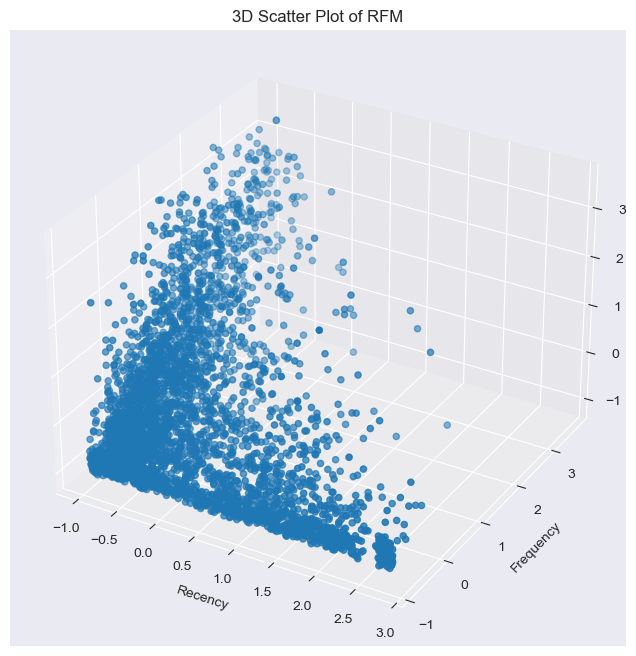

In [41]:
fig = plt.figure(figsize=[8, 8])

ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(
    scaled_data_df["Recency"],
    scaled_data_df["Frequency"],
    scaled_data_df["MonetaryValue"]
)

ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetary Value")
ax.set_title("3D Scatter Plot of RFM")

plt.show()

# KMeans Clustering

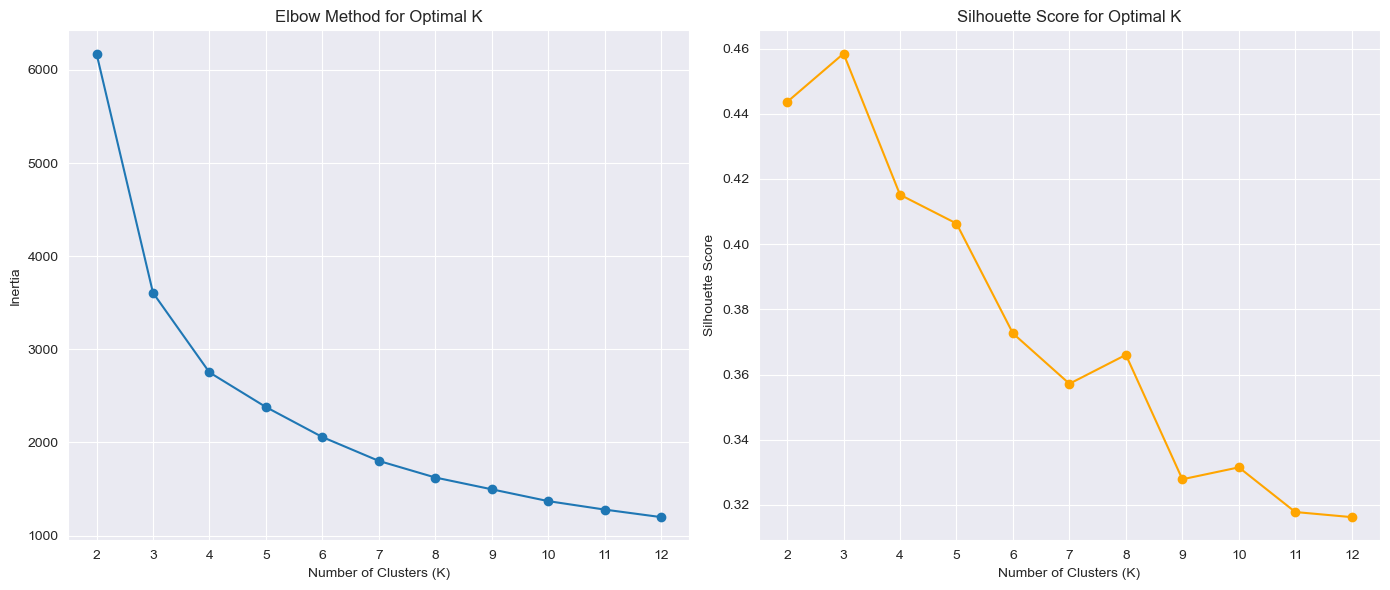

In [44]:
max_k = 12

inertia = []
silhouette_scores = []
k_values = range(2, max_k + 1)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000, n_init=10)
    cluster_labels = kmeans.fit_predict(scaled_data_df)
    sil_score = silhouette_score(scaled_data_df, cluster_labels)
    silhouette_scores.append(sil_score)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', color='orange')
plt.title("Silhouette Score for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

The elbow method suggests that the optimal number of clusters is either 4 or 5, as the inertia starts to decrease at a slower rate after those points.

### Silhouette Score
The silhouette score is a measure of how similar an object is to its own cluster compared to other clusters. It ranges from -1 to 1, where a higher value indicates better-defined clusters. A silhouette score close to 1 indicates that the points are well clustered, while a score close to 0 indicates that the points are on or very close to the decision boundary between two neighboring clusters.

$$s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}$$

Where:
- \(s(i)\) is the silhouette score for point \(i\)
- \(a(i)\) is the average distance between point \(i\) and all other points in the same cluster
- \(b(i)\) is the average distance between point \(i\) and all points in the nearest cluster (the cluster with the smallest average distance to point \(i\))
- \(max(a(i), b(i))\) is used to normalize the score, ensuring it lies between -1 and 1.

The silhouette score suggests that the optimal number of clusters is 4, as it has the highest value.

In [45]:
kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000, n_init=10)
cluster_labels = kmeans.fit_predict(scaled_data_df)

cluster_labels

array([3, 0, 2, ..., 3, 0, 0], dtype=int32)

In [46]:
non_outliers_df["Cluster"] = cluster_labels

non_outliers_df.head(10)

/var/folders/8_/x1bt0c3j4fx8b4vg7ww1mlb40000gn/T/ipykernel_53824/2416664624.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df["Cluster"] = cluster_labels


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,"12,346.00",169.36,2,2010-06-28 13:53:00,164,3
1,"12,347.00","1,323.32",2,2010-12-07 14:57:00,2,0
2,"12,348.00",221.16,1,2010-09-27 14:59:00,73,2
3,"12,349.00","2,221.14",2,2010-10-28 08:23:00,42,0
4,"12,351.00",300.93,1,2010-11-29 15:23:00,10,2
5,"12,352.00",343.80,2,2010-11-29 10:07:00,10,2
6,"12,353.00",317.76,1,2010-10-27 12:44:00,43,2
7,"12,355.00",488.21,1,2010-05-21 11:59:00,202,3
8,"12,356.00","3,126.25",3,2010-11-24 12:24:00,15,1
10,"12,358.00","2,519.01",3,2010-11-29 10:56:00,10,0


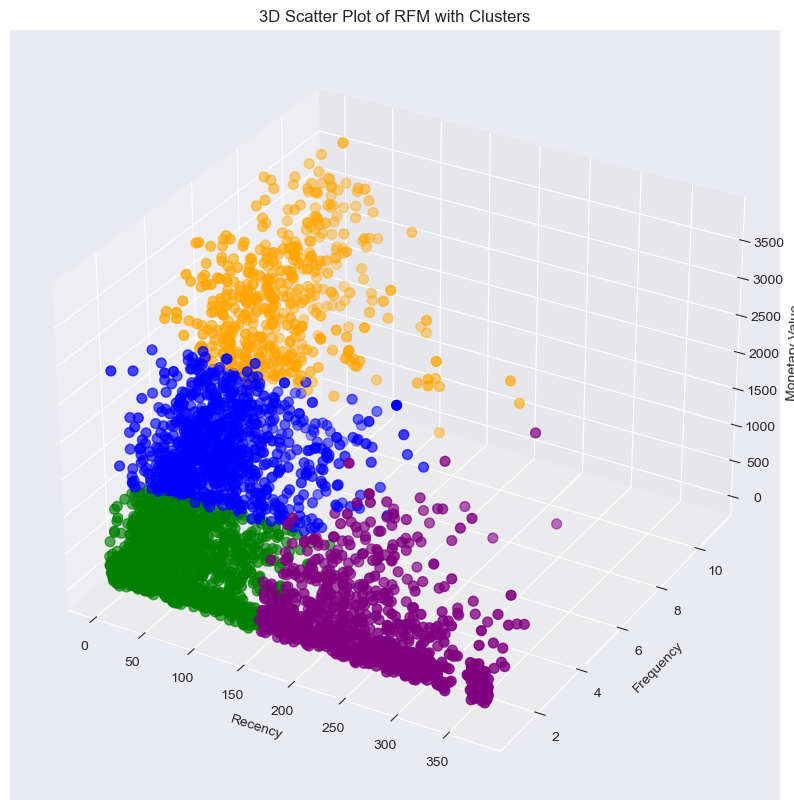

In [47]:
cluster_colors = {
    0: "blue",
    1: "orange",
    2: "green",
    3: "purple"
}

colors = non_outliers_df["Cluster"].map(cluster_colors)

fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(
    non_outliers_df["Recency"],
    non_outliers_df["Frequency"],
    non_outliers_df["MonetaryValue"],
    c=colors,
    s=50
)

ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetary Value")

ax.set_title("3D Scatter Plot of RFM with Clusters")

plt.show()

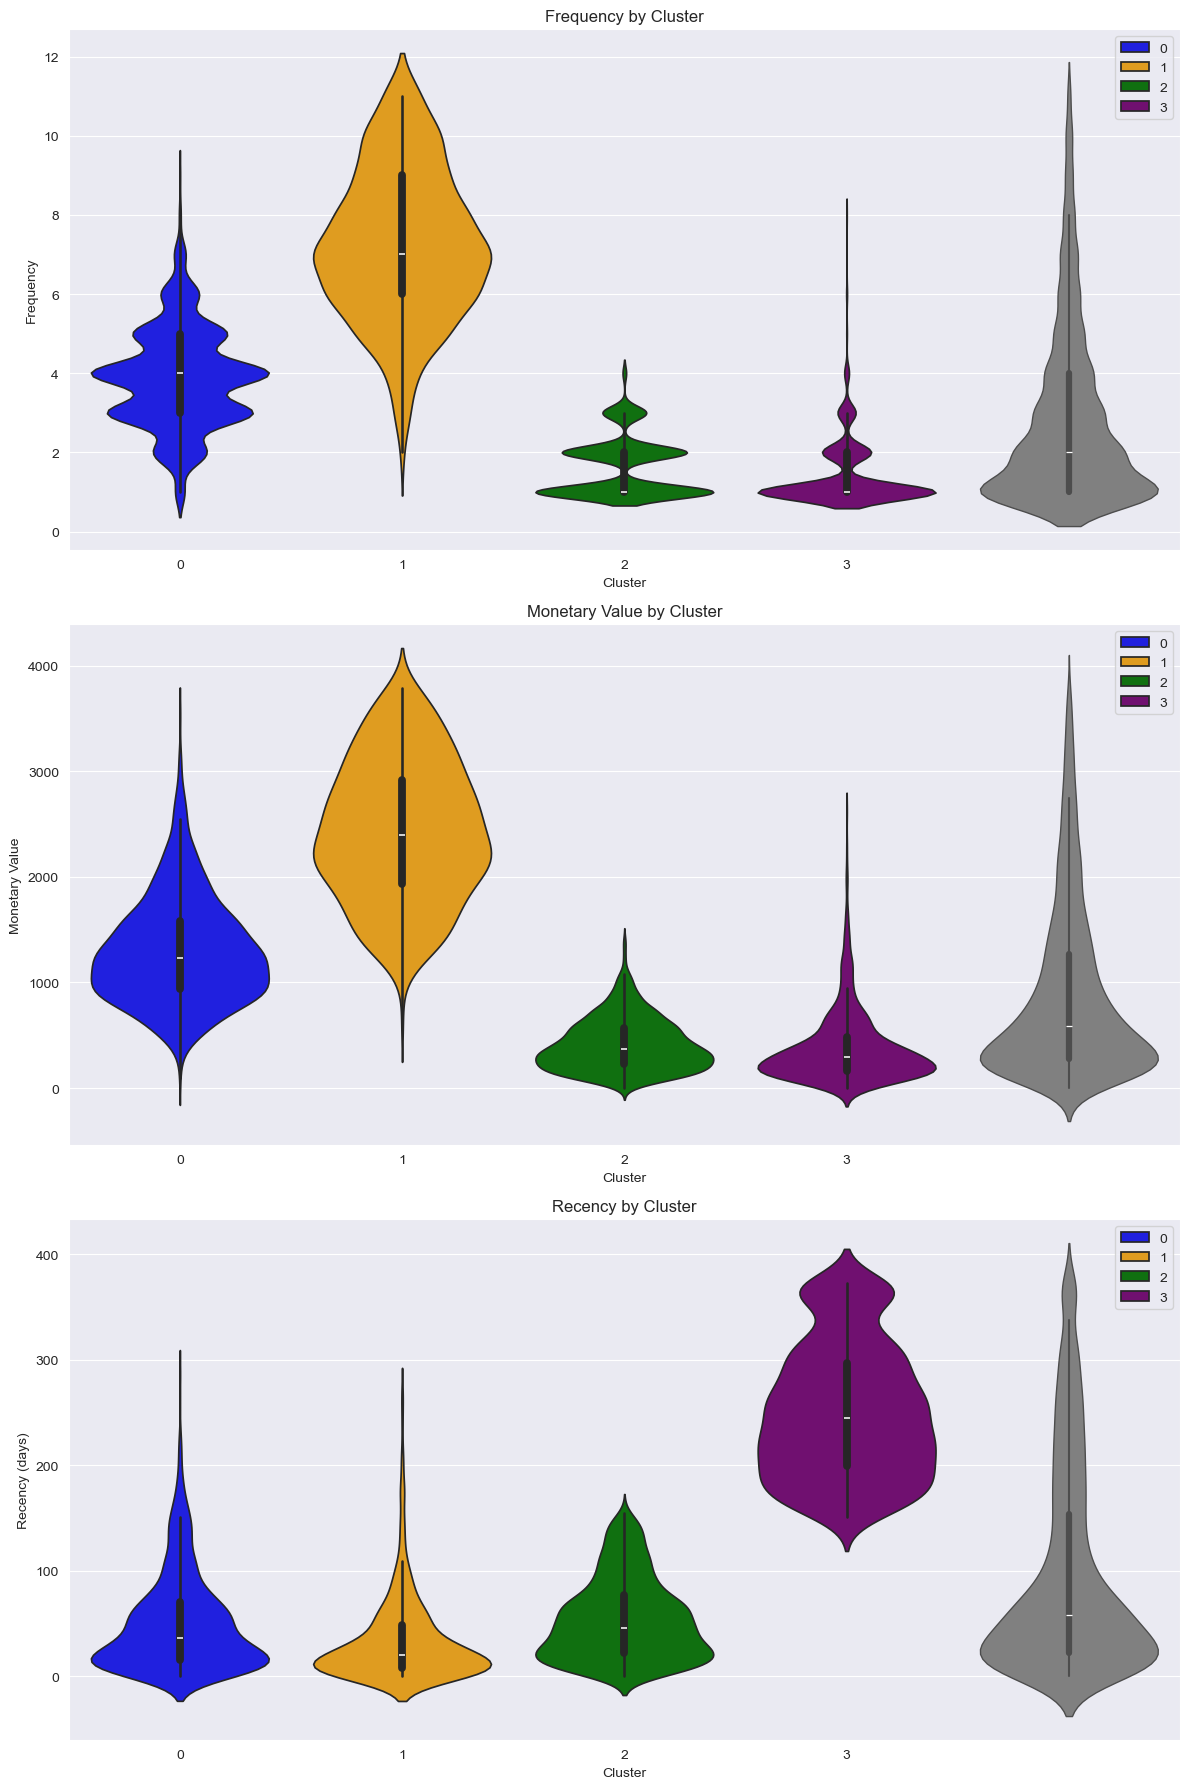

In [49]:
plt.figure(figsize=[12, 18])

plt.subplot(3, 1, 1)
sns.violinplot(x=non_outliers_df["Cluster"], y=non_outliers_df["Frequency"], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df["Frequency"], color="gray", linewidth=1.0)
plt.title("Frequency by Cluster")
plt.ylabel("Frequency")

plt.subplot(3, 1, 2)
sns.violinplot(x=non_outliers_df["Cluster"], y=non_outliers_df["MonetaryValue"], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df["MonetaryValue"], color="gray", linewidth=1.0)
plt.title("Monetary Value by Cluster")
plt.ylabel("Monetary Value")

plt.subplot(3, 1, 3)
sns.violinplot(x=non_outliers_df["Cluster"], y=non_outliers_df["Recency"], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df["Recency"], color="gray", linewidth=1.0)
plt.title("Recency by Cluster")
plt.ylabel("Recency (days)")

plt.tight_layout()
plt.show()

1. **Cluster 0 (Blue)**: "Retain"
    - Represents customers with above‑average frequency and spend; fairly recent purchasers (low recency).
    - They are strong, regular customers who are still engaged. The focus should be on retaining these customers and encouraging them to continue their purchasing behavior.
    - Action: Implement retention strategies, personalized offers and loyalty programs.
2. **Cluster 1 (Orange)**: "Champions"
    - Represents customers with the highest frequency & monetary value; lowest recency (bought most recently).
    - They are the best customers. Rewarding them is key to maintaining their loyalty.
    - Action: Implement a robust loyalty program, personalized offers, and targeted marketing campaigns to encourage repeat purchases.
3. **Cluster 2 (Green)**: "Potential"
    - Represents customers with low frequency & monetary value; moderate recency.
    - They are new or occasional buyers who’ve made a purchase not too long ago. The focus should be on nurturing these customers to increase their engagement and spending.
    - Action: Focus on building relationships, providing excellent customer service, and offering incentives to encourage repeat purchases.
4. **Cluster 3 (Purple)**: "At Risk"
    - Represents customers with low frequency & monetary value; highest recency (haven’t purchased in a long time).
    - They are at risk of churning. The focus should be on re-engaging these customers to prevent them from leaving.
    - Action: Send win‑back emails, special “we miss you” discounts, targeted reminders.

In [51]:
overlap_indices = monetary_outliers_df.index.intersection(frequency_outliers_df.index)

monetary_only_outliers = monetary_outliers_df.drop(overlap_indices)
frequency_only_outliers = frequency_outliers_df.drop(overlap_indices)
monetary_and_frequency_outliers = monetary_outliers_df.loc[overlap_indices]

monetary_only_outliers["Cluster"] = -1
frequency_only_outliers["Cluster"] = -2
monetary_and_frequency_outliers["Cluster"] = -3

outlier_clusters_df = pd.concat([
    monetary_only_outliers,
    frequency_only_outliers,
    monetary_and_frequency_outliers
])

In [52]:
outlier_clusters_df.head(10)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
9,"12,357.00","11,229.99",1,2010-11-16 10:05:00,23,-1
25,"12,380.00","4,782.84",4,2010-08-31 14:54:00,100,-1
42,"12,409.00","12,346.62",4,2010-10-15 10:24:00,55,-1
48,"12,415.00","19,468.84",4,2010-11-29 15:07:00,10,-1
61,"12,431.00","4,145.52",11,2010-12-01 10:03:00,8,-1
62,"12,433.00","7,205.39",5,2010-12-08 16:49:00,1,-1
64,"12,435.00","6,096.04",4,2010-11-08 10:07:00,31,-1
74,"12,454.00","12,931.44",3,2010-11-09 10:09:00,30,-1
86,"12,474.00","4,616.66",11,2010-11-26 12:19:00,13,-1
88,"12,476.00","6,452.99",7,2010-11-07 15:34:00,32,-1


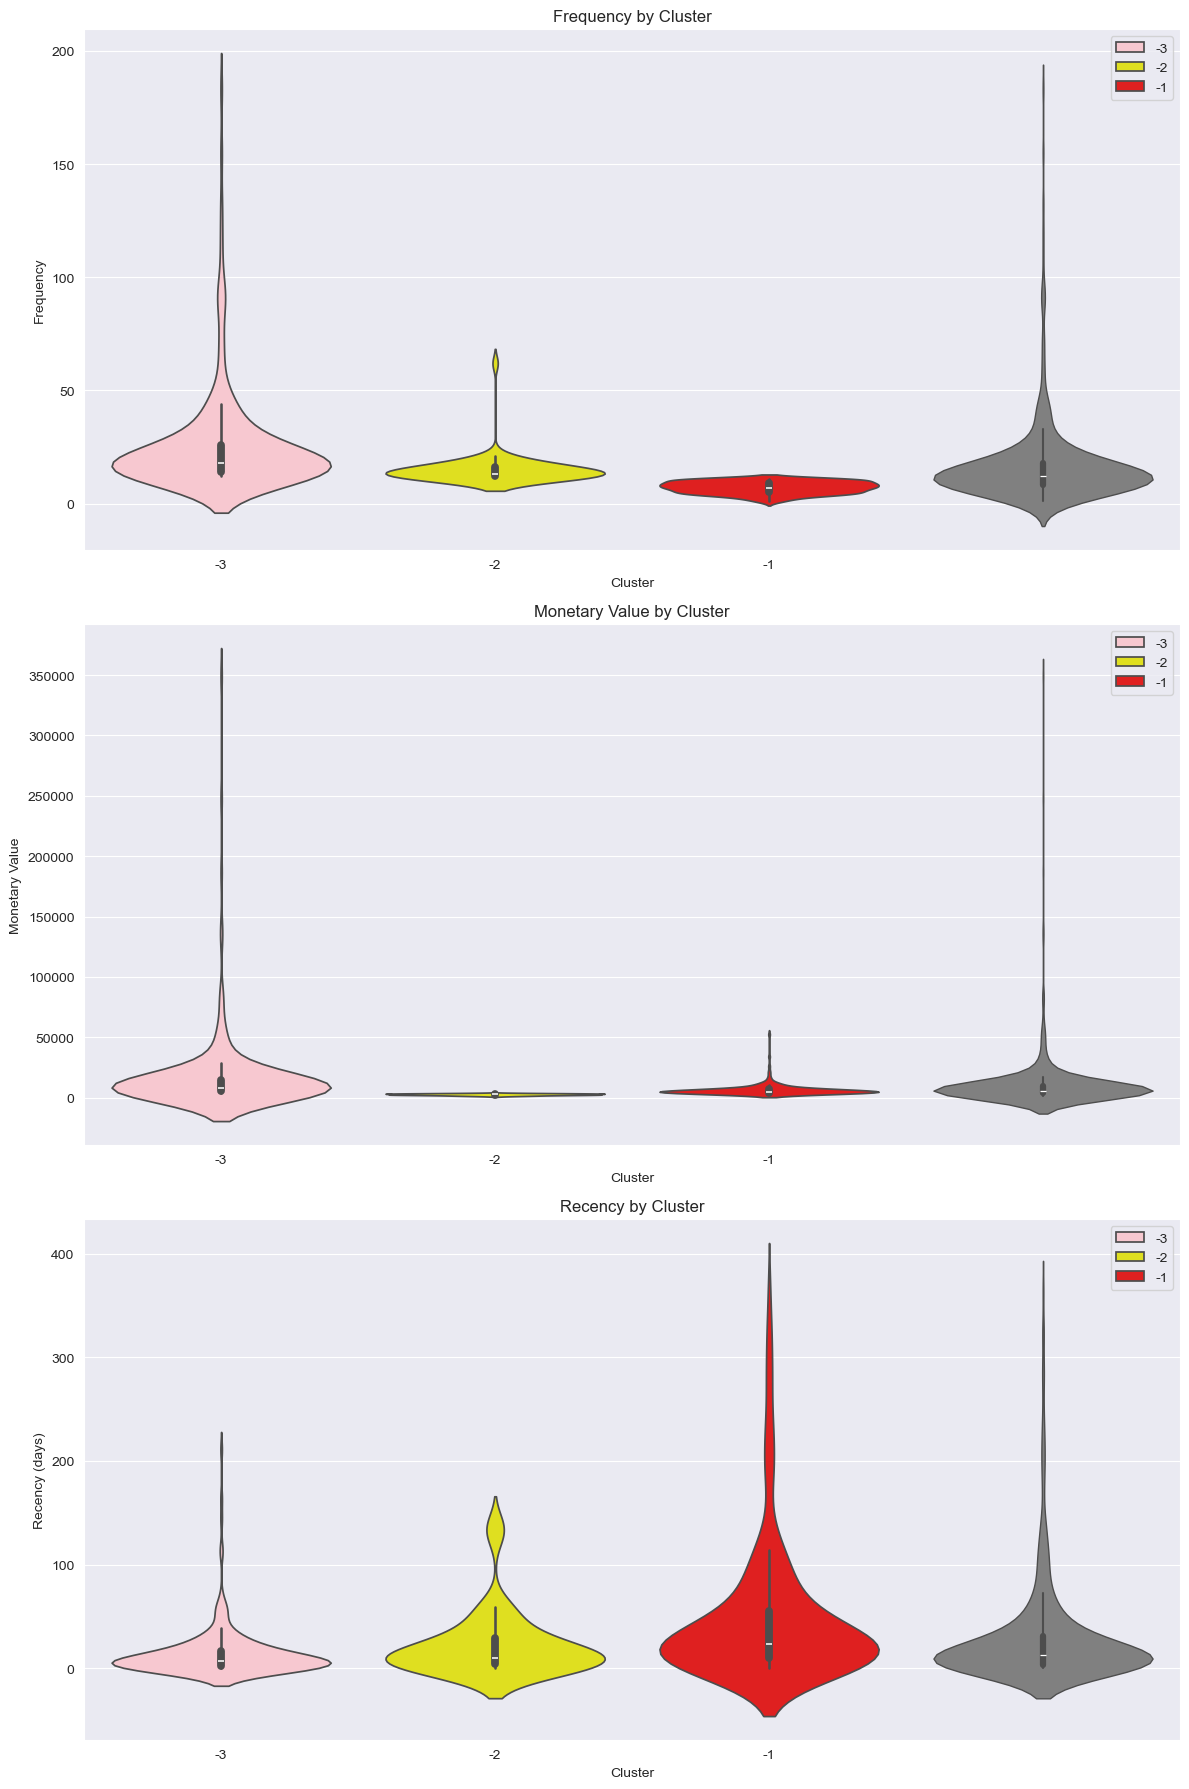

In [53]:
cluster_colors = {
    -1: "red",    # Monetary outliers
    -2: "yellow", # Frequency outliers
    -3: "pink",   # Both monetary and frequency outliers
}

plt.figure(figsize=[12, 18])

plt.subplot(3, 1, 1)
sns.violinplot(x=outlier_clusters_df["Cluster"], y=outlier_clusters_df["Frequency"], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df["Frequency"], color="gray", linewidth=1.0)
plt.title("Frequency by Cluster")
plt.ylabel("Frequency")

plt.subplot(3, 1, 2)
sns.violinplot(x=outlier_clusters_df["Cluster"], y=outlier_clusters_df["MonetaryValue"], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df["MonetaryValue"], color="gray", linewidth=1.0)
plt.title("Monetary Value by Cluster")
plt.ylabel("Monetary Value")

plt.subplot(3, 1, 3)
sns.violinplot(x=outlier_clusters_df["Cluster"], y=outlier_clusters_df["Recency"], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df["Recency"], color="gray", linewidth=1.0)
plt.title("Recency by Cluster")
plt.ylabel("Recency (days)")

plt.tight_layout()
plt.show()

1. **Monetary Outliers (Red)**: "High-Value but Infrequent"
    - These customers have some high spent, but the majority is medium. They are infrequent purchasers, with a high recency.
    - They are big spenders that buy infrequently and may be losing engagement.
    - Action: Perform reactivation campaigns, individual contact. Offer luxury services that cater to their high spending habits.
2. **Frequency Outliers (Yellow)**: "Frequent Buyers"
    - These customers have a high frequency of purchases, but the monetary value is low. Recency is moderate.
    - They are frequent buyers, but they are low spenders. They may be buying low-cost items or taking advantage of discounts.
    - Action: Encourage them to increase their spending through bundles and cross-selling strategies. Suggest upgrade options and give progressive coupons.
3. **Both Monetary and Frequency Outliers (Pink)**: "Elite Champions"
    - These customers have both high frequency & monetary value, and low recency.
    - They are super customers who are highly engaged and spend a lot.
    - Action: Implement VIP programs, exclusive offers and referral incentives, and upsell premium products.

In [54]:
cluster_labels = {
    0: "Retain",
    1: "Champions",
    2: "Potential",
    3: "At Risk",
    -1: "High-Value but Infrequent",
    -2: "Frequent Buyers",
    -3: "Elite Champions"
}

In [55]:
full_clustering_df = pd.concat([non_outliers_df, outlier_clusters_df])

full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,"12,346.00",169.36,2,2010-06-28 13:53:00,164,3
1,"12,347.00","1,323.32",2,2010-12-07 14:57:00,2,0
2,"12,348.00",221.16,1,2010-09-27 14:59:00,73,2
3,"12,349.00","2,221.14",2,2010-10-28 08:23:00,42,0
4,"12,351.00",300.93,1,2010-11-29 15:23:00,10,2
...,...,...,...,...,...,...
4235,"18,223.00","7,516.31",12,2010-11-17 12:20:00,22,-3
4236,"18,225.00","7,545.14",15,2010-12-09 15:46:00,0,-3
4237,"18,226.00","6,650.83",15,2010-11-26 15:51:00,13,-3
4241,"18,231.00","4,791.80",23,2010-10-29 14:17:00,41,-3


In [56]:
full_clustering_df["ClusterLabel"] = full_clustering_df["Cluster"].map(cluster_labels)

full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster,ClusterLabel
0,"12,346.00",169.36,2,2010-06-28 13:53:00,164,3,At Risk
1,"12,347.00","1,323.32",2,2010-12-07 14:57:00,2,0,Retain
2,"12,348.00",221.16,1,2010-09-27 14:59:00,73,2,Potential
3,"12,349.00","2,221.14",2,2010-10-28 08:23:00,42,0,Retain
4,"12,351.00",300.93,1,2010-11-29 15:23:00,10,2,Potential
...,...,...,...,...,...,...,...
4235,"18,223.00","7,516.31",12,2010-11-17 12:20:00,22,-3,Elite Champions
4236,"18,225.00","7,545.14",15,2010-12-09 15:46:00,0,-3,Elite Champions
4237,"18,226.00","6,650.83",15,2010-11-26 15:51:00,13,-3,Elite Champions
4241,"18,231.00","4,791.80",23,2010-10-29 14:17:00,41,-3,Elite Champions


# Visualisation

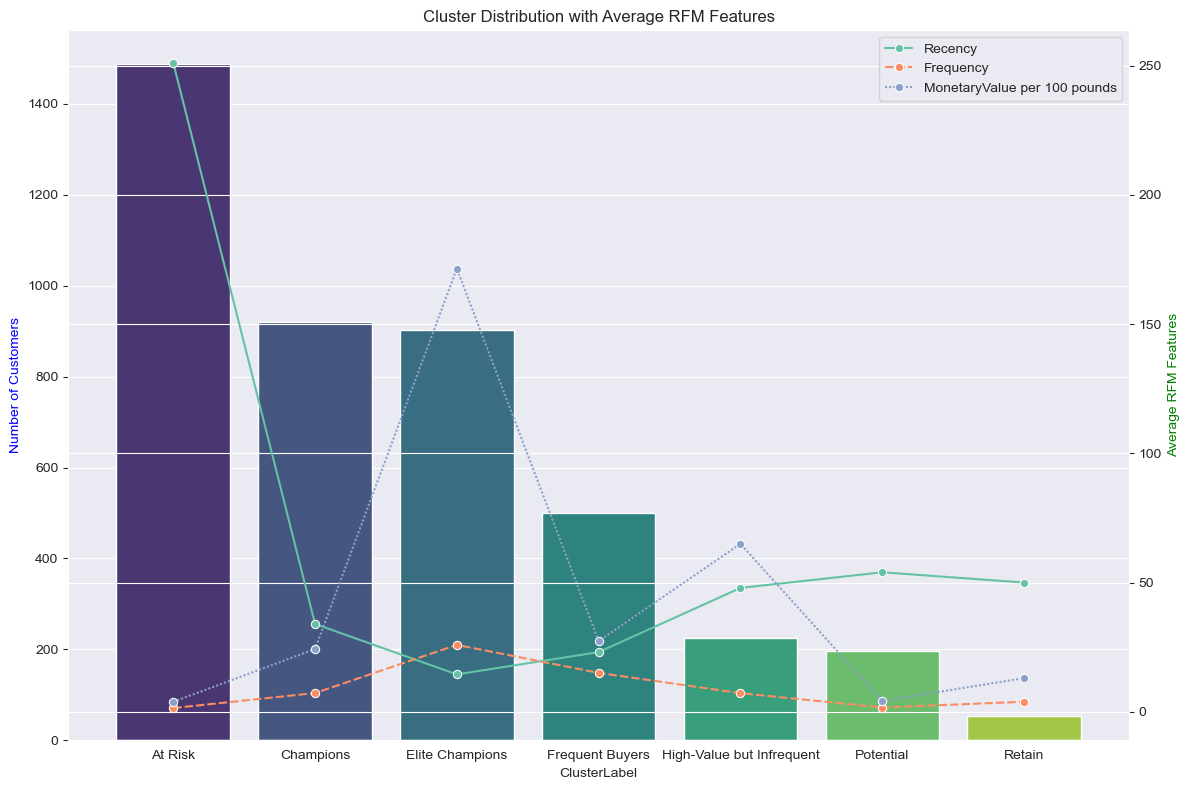

In [62]:
cluster_counts = full_clustering_df["ClusterLabel"].value_counts()
full_clustering_df["MonetaryValue per 100 pounds"] = full_clustering_df["MonetaryValue"] / 100.00
feature_means = full_clustering_df.groupby("ClusterLabel")[["Recency", "Frequency", "MonetaryValue per 100 pounds"]].mean()

fig, ax1 = plt.subplots(figsize=(12, 8))

sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette="viridis", hue=cluster_counts.index)
ax1.set_ylabel("Number of Customers", color="b")
ax1.set_title("Cluster Distribution with Average RFM Features")

ax2 = ax1.twinx()

sns.lineplot(data=feature_means, ax=ax2, palette="Set2", marker="o")
ax2.set_ylabel("Average RFM Features", color="g")

plt.tight_layout()
plt.show()